In [1]:
import platform
import torch

print("OS:", platform.system())
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


OS: Linux
Torch version: 2.9.0+cu126
CUDA available: True


In [2]:
!pip install -U ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.8 MB/s eta 0:00:00


In [3]:
# Path to zip file in Colab
ZIP_PATH = "/content/chicken_d.zip"

# Where to extract
EXTRACT_PATH = "/content/data"

# Create target directory
!mkdir -p {EXTRACT_PATH}

# Unzip safely (overwrite if exists)
!unzip -o {ZIP_PATH} -d {EXTRACT_PATH}

print("✅ Dataset unzipped successfully")


Streaming output truncated to the last 5000 lines.
 extracting: /content/data/train/images/156eb6950686d283_jpg.rf.edd7106f852e4872c90e164286c370ba.jpg  
 extracting: /content/data/train/images/1597ba4d28d8313f_jpg.rf.e7f235f331c7f6407d7d9c32aef7b0e1.jpg  
 extracting: /content/data/train/images/15b551835173b7ee_jpg.rf.9a92e7226a907d5f6fd51ef1f77cd8a2.jpg  
 extracting: /content/data/train/images/15b551835173b7ee_jpg.rf.a2112f2cee0a906bff42574fe10d3756.jpg  
 extracting: /content/data/train/images/15c73378837afa24_jpg.rf.80b375237e35012d141d8d52368625e0.jpg  
 extracting: /content/data/train/images/161_jpeg_jpg.rf.cba4b273c8697dde355e412ba2dcdf31.jpg  
 extracting: /content/data/train/images/1625499541_15-funart-pro-p-porodi-kur-broilerov-zhivotnie-krasivo-fot-21_jpg.rf.33dcc89a32579554aa868c00acfd5a98.jpg  
 extracting: /content/data/train/images/1625499591_8-funart-pro-p-porodi-kur-broilerov-zhivotnie-krasivo-fot-9_jpg.rf.36f1dfe18e2bad47461bf71c2420fbf7.jpg  
 extracting: /content/d

In [4]:
!ls /content/data


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [5]:
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
DATA_ROOT = "/content/data"
assert os.path.exists(DATA_ROOT), "DATA_ROOT not found!"
print("Using dataset at:", DATA_ROOT)


Using dataset at: /content/data


In [19]:
model = YOLO("yolov8m.pt")  # lightweight, good for this task


In [20]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

model.train(
    data=f"{DATA_ROOT}/data.yaml",
    epochs=80,              # more epochs for occlusion learning
    imgsz=640,
    batch=16,
    device=0,

    # =========================
    # AUGMENTATION (CRITICAL)
    # =========================
    mosaic=1.0,             # simulate occlusion & crowding
    mixup=0.2,              # mild mixup (avoid overuse)
    copy_paste=0.1,         # helps dense scenes

    hsv_h=0.015,            # lighting robustness
    hsv_s=0.7,
    hsv_v=0.4,

    degrees=5.0,            # small camera tilt only
    translate=0.1,          # small shifts
    scale=0.5,              # distance variation
    shear=0.0,              # disable distortion

    fliplr=0.5,             # horizontal flip OK
    flipud=0.0,             # vertical flip NOT OK

    close_mosaic=10,        # turn off mosaic near end
    workers=2,

    project="runs",
    name="chicken_yolov8_augmented"
)


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=chicken_yolov8_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7994dc260830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [22]:
!ls  /content/runs/detect/train/weights


best.pt  last.pt


In [23]:
model.val(data=f"{DATA_ROOT}/data.yaml")


Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1287.4±541.4 MB/s, size: 50.8 KB)
val: Scanning /content/data/valid/labels.cache... 585 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 585/585 1.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 37/37 3.1it/s 12.0s
                   all        585       1690      0.932      0.875      0.933      0.748
Speed: 1.0ms preprocess, 15.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7995242c8830>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [24]:
import os, shutil

os.makedirs("/content/models", exist_ok=True)

shutil.copy(
    "/content/runs/detect/train/weights/best.pt",
    "/content/models/best.pt"
)

print("✅ best.pt saved to /content/models/")


✅ best.pt saved to /content/models/


In [25]:
from google.colab import files
files.download("/content/models/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import os

test_img = f"{DATA_ROOT}/test/images/" + os.listdir(f"{DATA_ROOT}/test/images")[0]
print("Testing on:", test_img)

model = YOLO("/content/models/best.pt")
model.predict(source=test_img, save=True)


Testing on: /content/data/test/images/8bec86ab838829d7_jpg.rf.4efbb15fd4ee86ceca427a324116e8ae.jpg

image 1/1 /content/data/test/images/8bec86ab838829d7_jpg.rf.4efbb15fd4ee86ceca427a324116e8ae.jpg: 448x640 (no detections), 69.5ms
Speed: 2.4ms preprocess, 69.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'chicken'}
 obb: None
 orig_img: array([[[ 0, 12,  4],
         [ 0, 12,  4],
         [ 0, 13,  5],
         ...,
         [53, 70, 66],
         [56, 72, 65],
         [58, 74, 67]],
 
        [[ 0, 12,  4],
         [ 0, 12,  4],
         [ 0, 13,  5],
         ...,
         [53, 70, 66],
         [56, 72, 65],
         [58, 74, 67]],
 
        [[ 0, 12,  4],
         [ 0, 12,  4],
         [ 0, 13,  5],
         ...,
         [55, 70, 66],
         [57, 73, 66],
         [59, 75, 68]],
 
        ...,
 
        [[ 1, 16,  8],
         [ 1, 16,  8],
         [ 1, 16,  8],
         ...,
         [ 7, 21, 27],
         [ 9, 20, 28],
         [ 7, 18, 26]],
 
        [[ 1, 16,  8],
         [ 1, 16,  8],
         [ 1, 16,  8],
         ...,
         [ 7, 21, 27],
         [ 9, 20, 28],
         [ 8, 19, 27]],
 
        [[ 0, 14,  6],
   

In [27]:

model.predict(
    source=f"{DATA_ROOT}/test/images",
    conf=0.25,
    save=True,
    project="runs",
    name="predict"
)

print("✅ Prediction completed")



image 1/292 /content/data/test/images/015e527097415aa2_jpg.rf.4de387cf89322a3e3b77481d2757161e.jpg: 448x640 1 chicken, 27.2ms
image 2/292 /content/data/test/images/0191fc13b7614846_jpg.rf.1e1e7c564fcc98bd2c7c331fde5536fe.jpg: 480x640 4 chickens, 49.7ms
image 3/292 /content/data/test/images/01a49dcf1fbad747_jpg.rf.b88e29ddb8e41858b1e1ee1b00d8c7a6.jpg: 640x640 3 chickens, 37.6ms
image 4/292 /content/data/test/images/01a49dcf1fbad747_jpg.rf.bd8939b71d6112d7e51de971d15919b7.jpg: 640x640 3 chickens, 36.9ms
image 5/292 /content/data/test/images/04241296b8082e9d_jpg.rf.bd2d09a09322fb1e1464b3768e52fe95.jpg: 480x640 2 chickens, 23.1ms
image 6/292 /content/data/test/images/042bfb27cadbb718_jpg.rf.e56737ac8ed22f820e854609ff433602.jpg: 640x640 1 chicken, 30.6ms
image 7/292 /content/data/test/images/045a5253237ceda4_jpg.rf.f9333efecaeb6feca0e67b3482fd5c2a.jpg: 480x640 1 chicken, 23.0ms
image 8/292 /content/data/test/images/075b4bac3156a7de_jpg.rf.7cfc5da0db84caba0bc42bedd29a6ad7.jpg: 448x640 1 chi

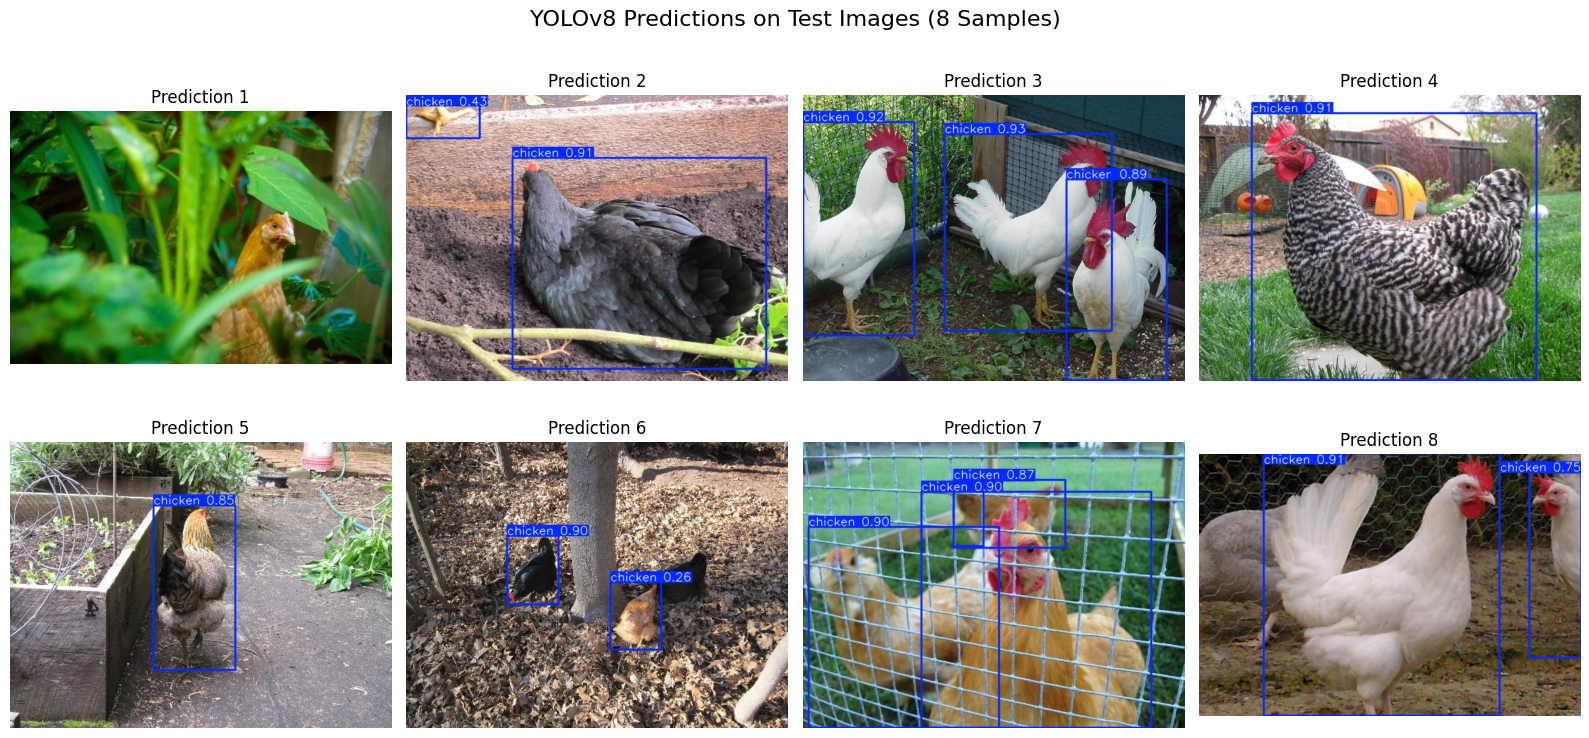

In [28]:
import cv2
import matplotlib.pyplot as plt

PRED_DIR = "runs/predict"

# collect image files
images = [f for f in os.listdir(PRED_DIR)
          if f.lower().endswith((".jpg", ".png", ".jpeg"))]

assert len(images) > 0, "No prediction images found!"

# take first 8
images = images[:8]

plt.figure(figsize=(16, 8))

for i, img_name in enumerate(images):
    img_path = os.path.join(PRED_DIR, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Prediction {i+1}")
    plt.axis("off")

plt.suptitle("YOLOv8 Predictions on Test Images (8 Samples)", fontsize=16)
plt.tight_layout()
plt.show()
